# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data


1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
data.shape

(5391, 6)

In [ ]:
data.duplicated().values.any()

False

In [ ]:
len(data[data.duplicated()])

0

In [ ]:
type(data.USD_Domestic_Gross[1])

str

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

Converting the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
  for char in chars_to_remove:
    data[col] = data[col].astype(str).str.replace(char, "", regex=False)
  data[col] = pd.to_numeric(data[col])


Converting the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date )
print(type(data.Release_Date[1]))
data.Release_Date.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

### Descriptive Statistics


1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

How many films grossed $0 domestically? What were the highest budget films that grossed nothing?

In [ ]:
print(f'How many films grossed $0 domestically: {data[data.USD_Domestic_Gross == 0].count()["USD_Domestic_Gross"]}')
print(f'What were the highest budget films that grossed nothing?: {data[data.USD_Domestic_Gross == 0].USD_Production_Budget.max()}')
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

How many films grossed $0 domestically: 512
What were the highest budget films that grossed nothing?: 175000000


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
print(f"How many films grossed $0 worldwide?: {data[data.USD_Worldwide_Gross == 0].count()['USD_Worldwide_Gross']}")
print('What are the highest budget films that had no revenue internationally?:')
print(data[data.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False))

How many films grossed $0 worldwide?: 357
What are the highest budget films that had no revenue internationally?:
      Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant             

### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.sort_values('USD_Worldwide_Gross', ascending=False).head(10)

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,17500000,60865364,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
3808,1855,2010-12-31,Konferenz der Tiere,30000000,53048539,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
3724,2777,2010-09-03,Hachiko: A Dog's Story,16000000,47707417,0


Using the [`.query()` function] to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.



In [ ]:
international_results = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
print(f'International releases = {len(international_results)}')
international_results.tail()

International releases = 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
future_releases = data[data['Release_Date'] >= scrape_date]
data_clean = data.drop(future_releases.index)
#data_clean = data[data.Release_Date < scrape_date]

### Films that Lost Money


What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
films_no_revenues = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
total_movies = len(data_clean)
pct_films_no_revenues = round((len(films_no_revenues) / total_movies) * 100, 2)
print(f'{pct_films_no_revenues}%')

37.28%


# Seaborn for Data Viz: Bubble Charts

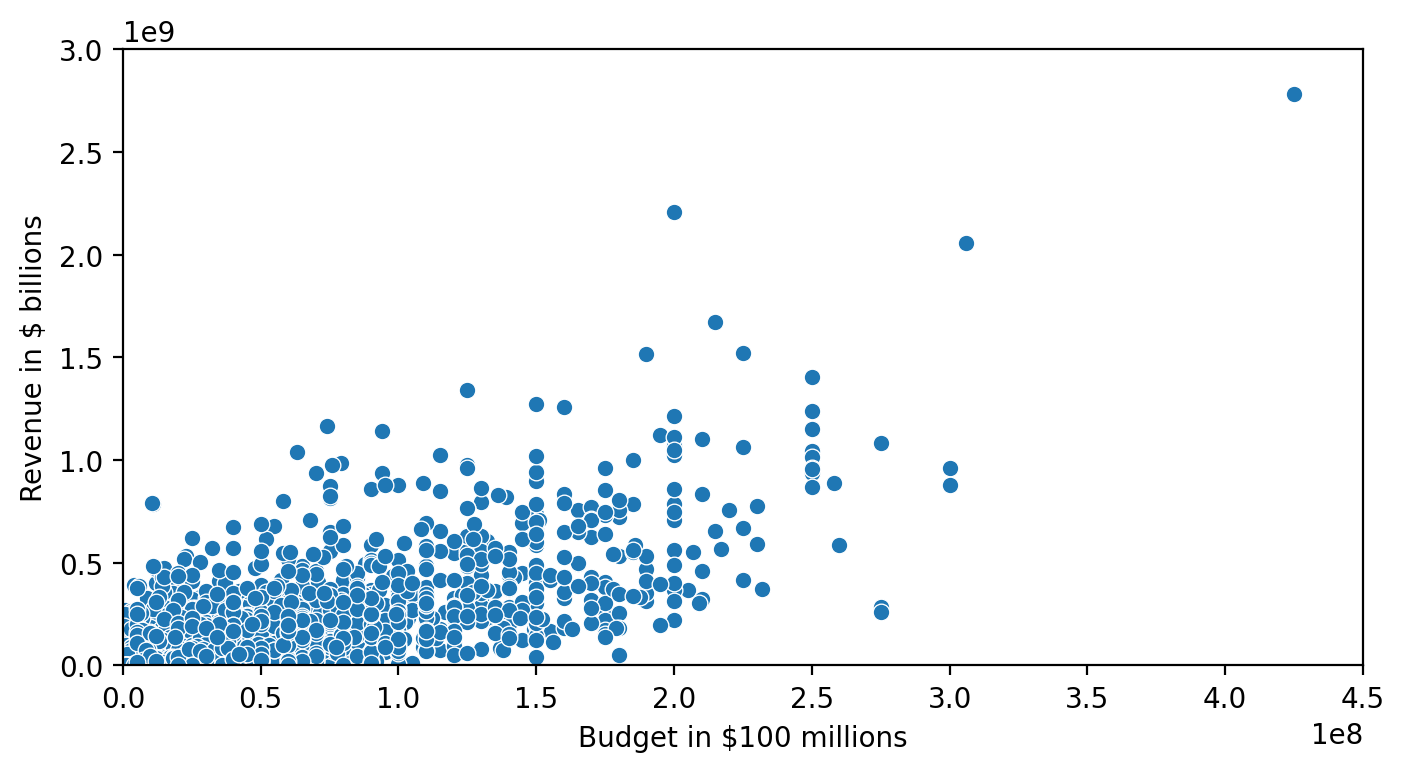

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

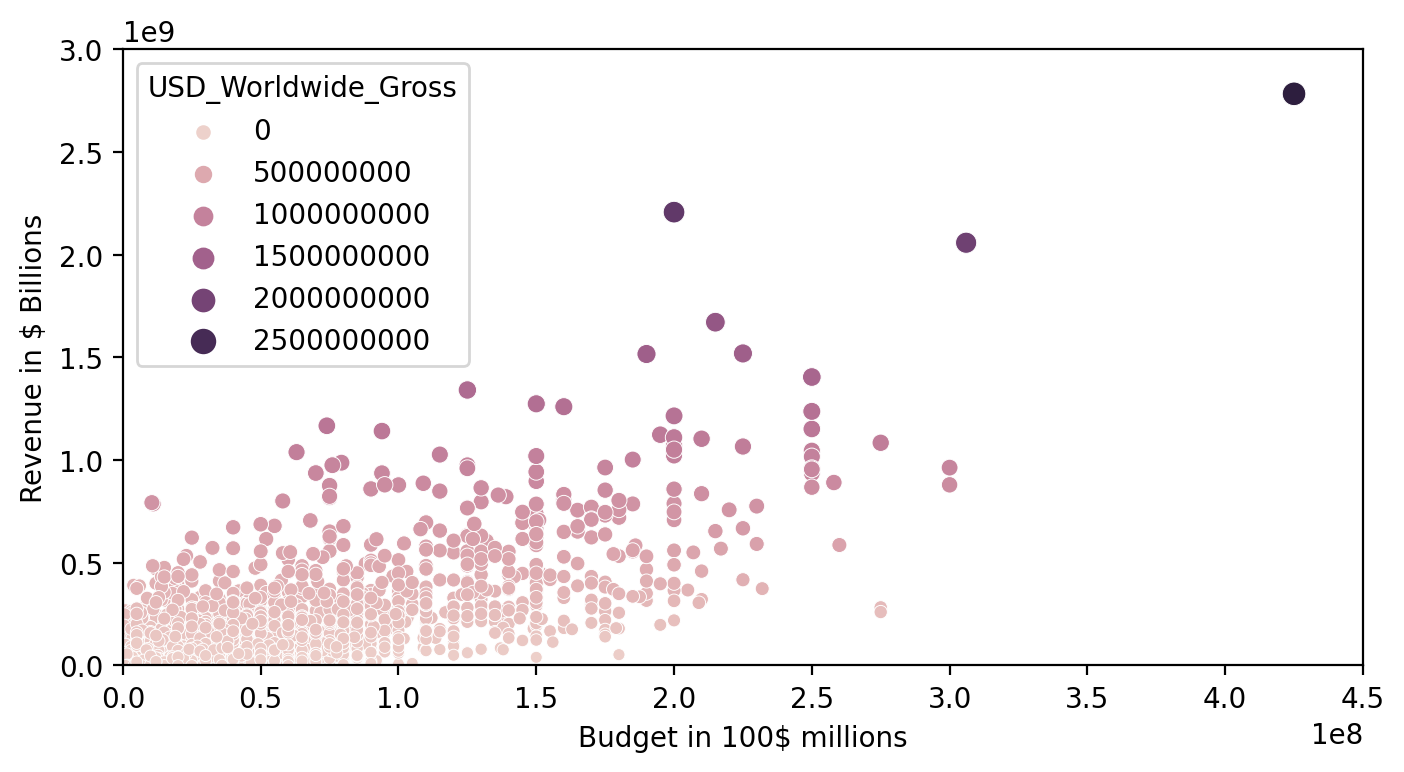

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross',
                     size='USD_Worldwide_Gross'
                     )
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ Billions',
       xlabel='Budget in 100$ millions',
       )

plt.show()

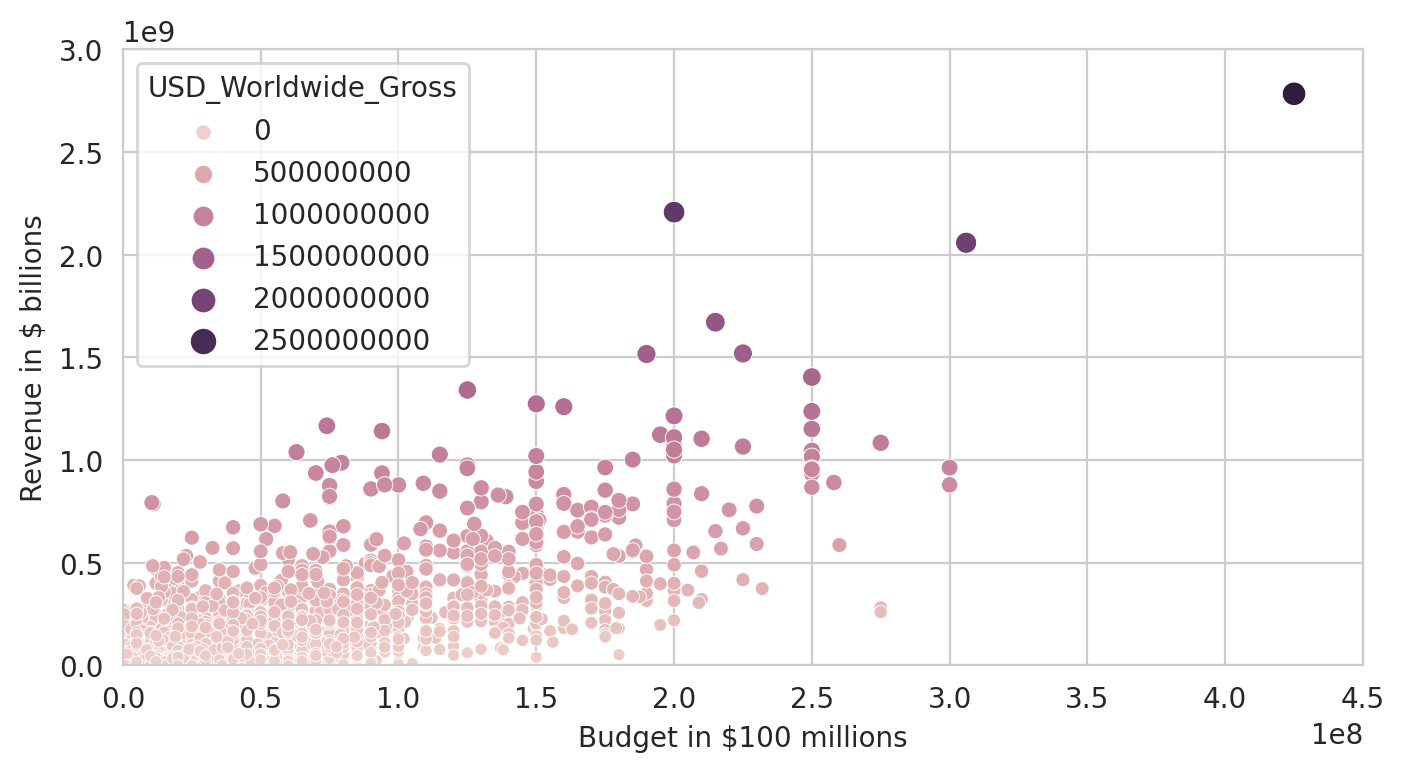

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('whitegrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

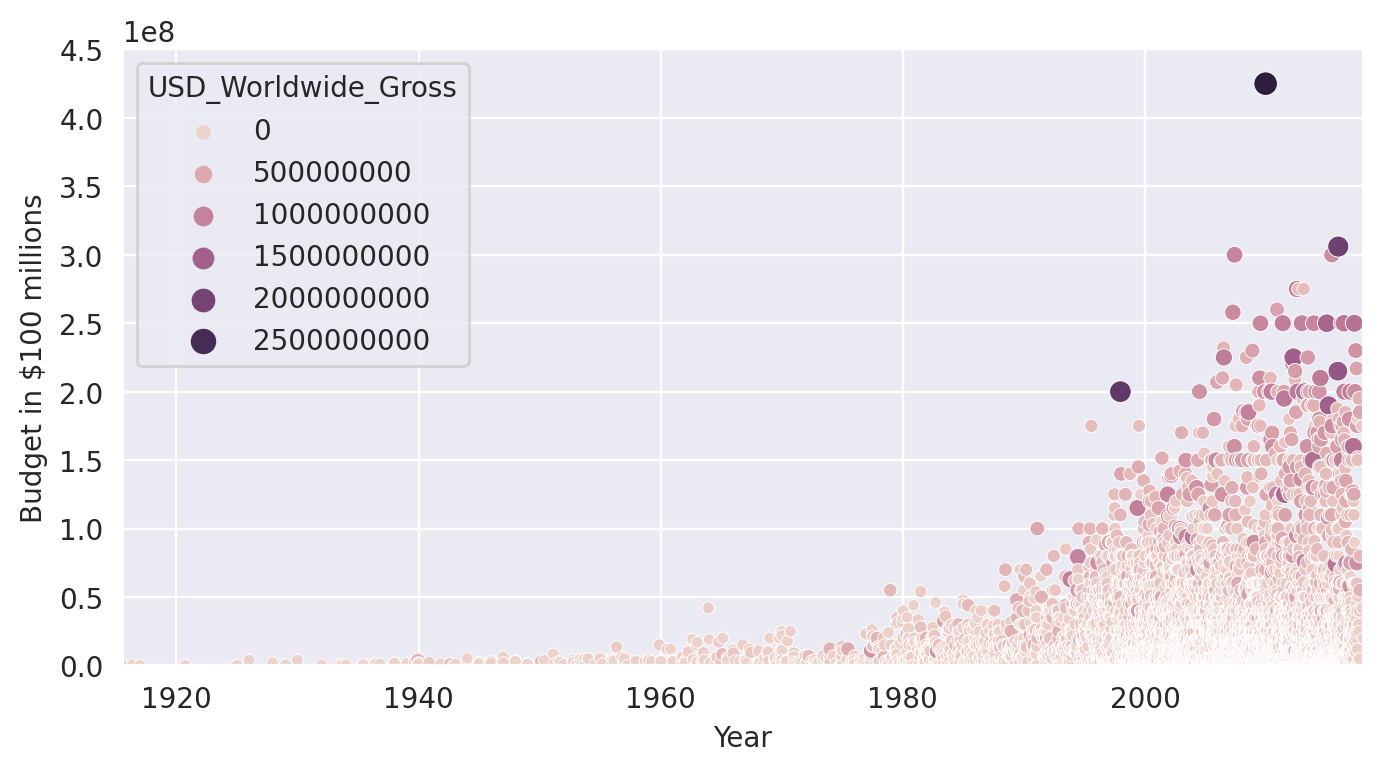

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 450000000),
         xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         xlabel='Year',
         ylabel='Budget in $100 millions')

  plt.show()

In [ ]:
date_index = pd.DatetimeIndex(data=data_clean.Release_Date)
decade = (date_index.year // 10) * 10
data_clean['Decade'] = decade
data_clean.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,1920
6,4630,1927-12-08,Wings,2000000,0,0,1920
7,5141,1929-01-02,The Broadway Melody,379000,4358000,2800000,1920
8,4240,1930-01-01,Hell's Angels,4000000,0,0,1930
9,5043,1931-12-31,Mata Hari,558000,900000,900000,1930


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
scrape_date_films = pd.Timestamp('1969-12-31')
old_films = data_clean[data_clean.Release_Date <= scrape_date_films]
new_films = data_clean[data_clean.Release_Date > scrape_date_films]
old_films.shape[0]
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

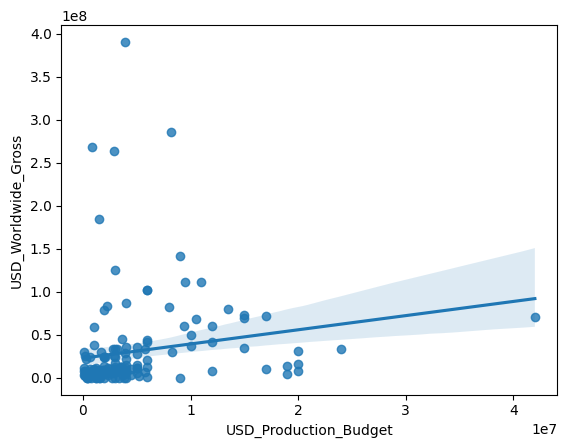

In [ ]:
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

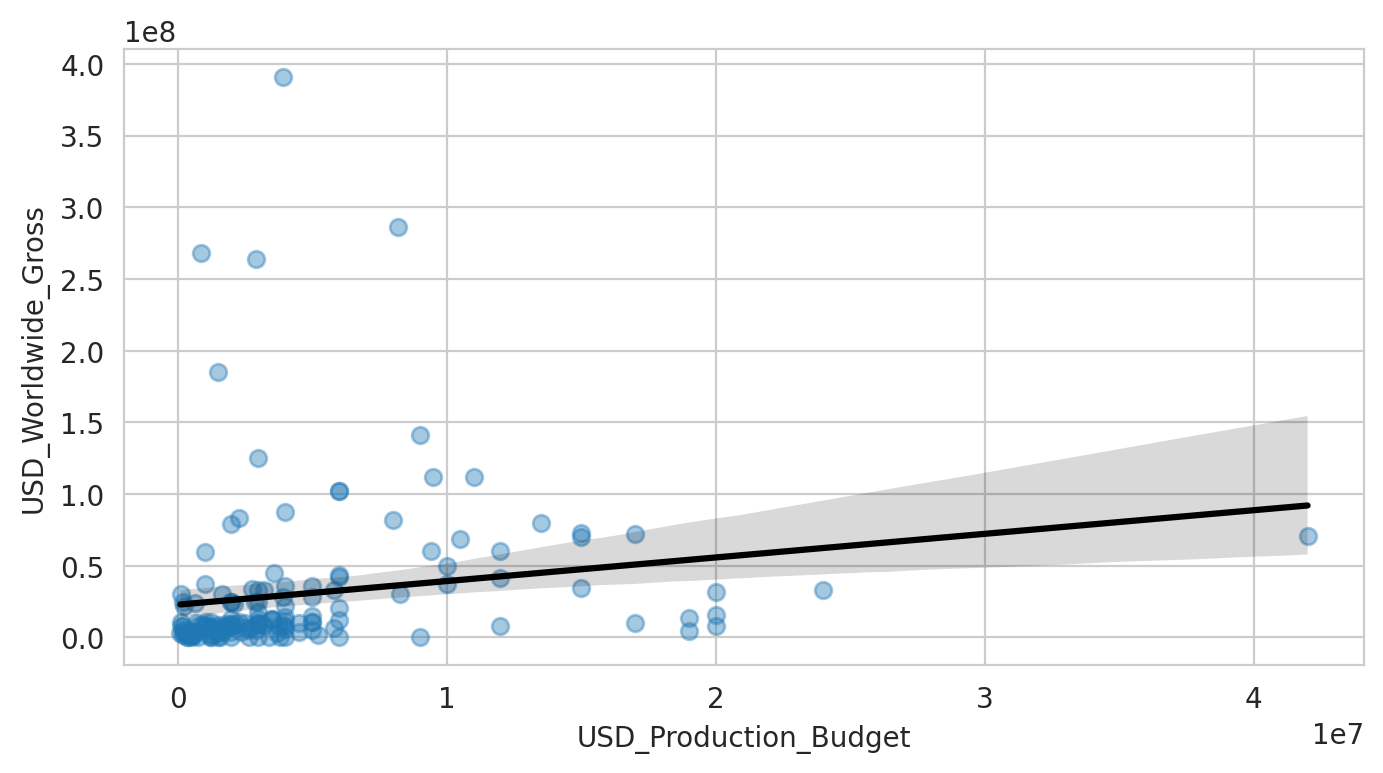

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws= {'alpha': 0.4},
              line_kws = {'color': 'black'})
plt.show()

Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

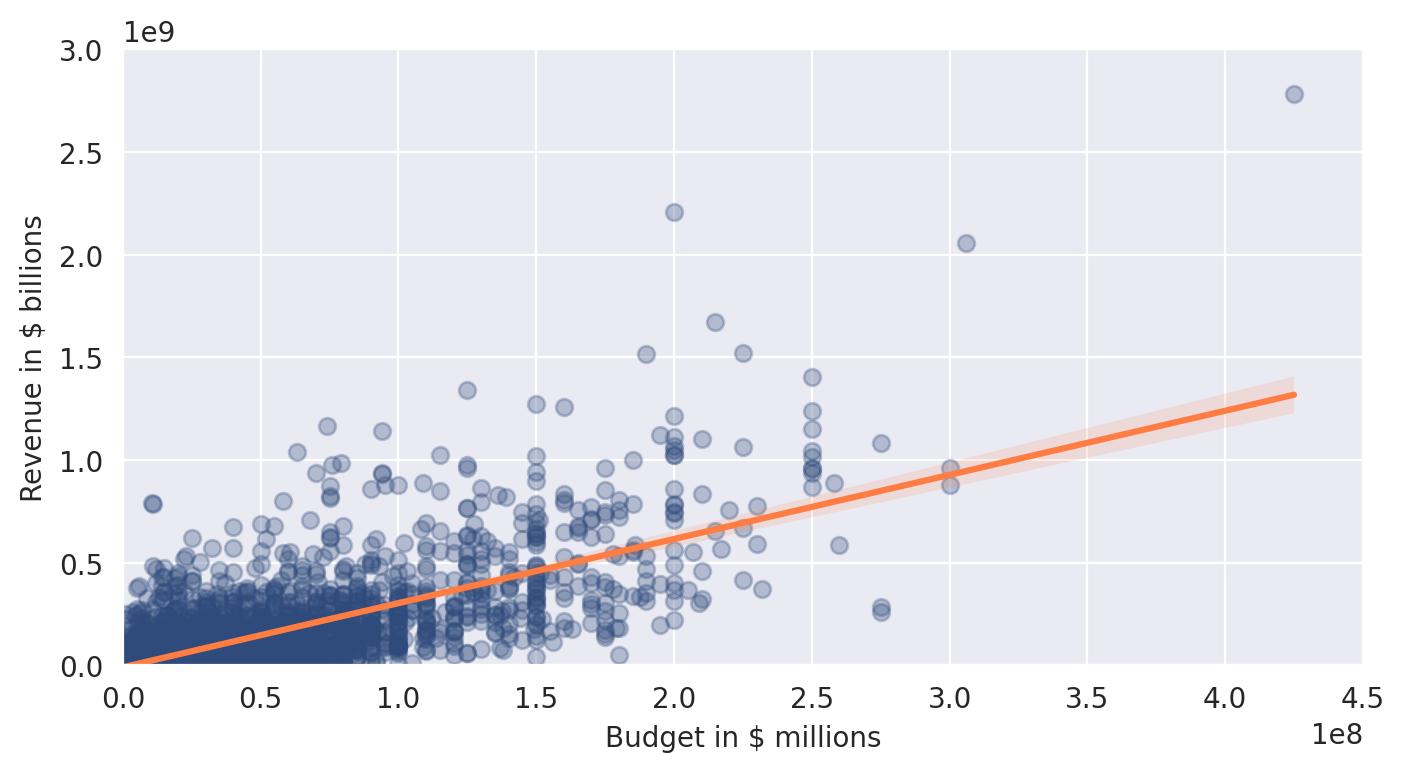

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              color = '#2f4b7c',
              scatter_kws={'alpha': 0.3},
              line_kws={'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         xlabel='Budget in $ millions',
         ylabel='Revenue in $ billions')

plt.show()

# Run Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
regression = LinearRegression()
#Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
#Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
#Find the best-fit line
regression.fit(X, y)
# Theta Zero
print(regression.intercept_)
# Theta One
print(regression.coef_)

# R-squared
regression.score(X, y)

[-8650768.00661027]
[[3.12259592]]


0.5577032617720403

Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
theta_0 = regression.intercept_
theta_1 = regression.coef_
r_squared = regression.score(X, y)

In [ ]:
print(theta_0)

[22821538.63508039]


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
22821538 + 1.64771314 * 350000000

599521137.0

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The stimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The stimated revenue for a $350 film is around $600000000.0.
